# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [10]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Play with the data to get a sense of the structure

In [11]:
import numpy as np
print(type(X_train))
print(np.mean(X_train,axis=(0,1,2)))
print(train['features'][0][0][0]) # the first image in the training set, the top left pixel, the values for 3 channels of the pixel  are [28, 25, 24]
print(len(train['sizes']))
print(train['features'][0].shape)
print(train['sizes'].shape[0])
print(train['sizes'][0])
print(train['coords'][0])
print(np.unique(np.concatenate((train['labels'], valid['labels'], test['labels']))).shape[0])

<class 'numpy.ndarray'>
[ 86.69812205  79.49594061  81.83870445]
[28 25 24]
34799
(32, 32, 3)
34799
[26 25]
[ 6  5 21 20]
43


In [3]:
print(np.mean(X_train, axis=0).shape)
print(y_train[0])

(32, 32, 3)
41


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = train['sizes'].shape[0]

# TODO: Number of validation examples
n_validation = valid['sizes'].shape[0]

# TODO: Number of testing examples.
n_test = test['sizes'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(np.concatenate((train['labels'], valid['labels'], test['labels']))).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Self defined method to transfer rgb image to gray scale

In [15]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

### Plot rgb, randomly rotated gray scale and randomly shifted images for each class

The number of images to be plotted:  43


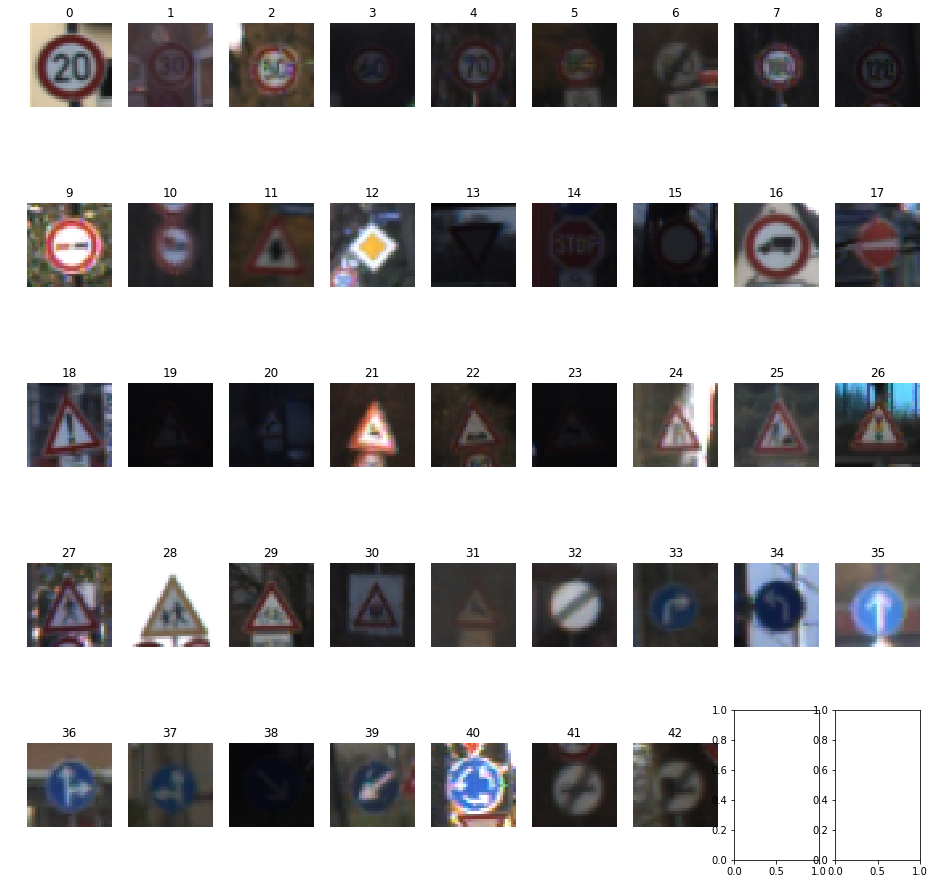

In [7]:
# plot all the unique signs in the training set, note images represent the same sign might be slightly different
# e.g. some might be darker and some might be brighter
# numbers as image titles are the codes correspond to the meanings of the signs
# you can look up the table here
# https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/signnames.csv
train_unique, train_unique_counts = np.unique(train['labels'], return_counts=True)
train_unique_counts = dict(zip(train_unique, train_unique_counts))
print("The number of images to be plotted: ", len(train_unique))

fig, axeslist = plt.subplots(ncols=len(train_unique) // 5 + 1, nrows=5, figsize=(16, 16))
for idx in range(len(train_unique)):
    first_occurrence_index = np.flatnonzero(train['labels'] == train_unique[idx])[0]

    image = train['features'][first_occurrence_index]
    image = image.squeeze()
    axeslist.ravel()[idx].imshow(image)
    axeslist.ravel()[idx].set_title(train_unique[idx])
    axeslist.ravel()[idx].set_axis_off()

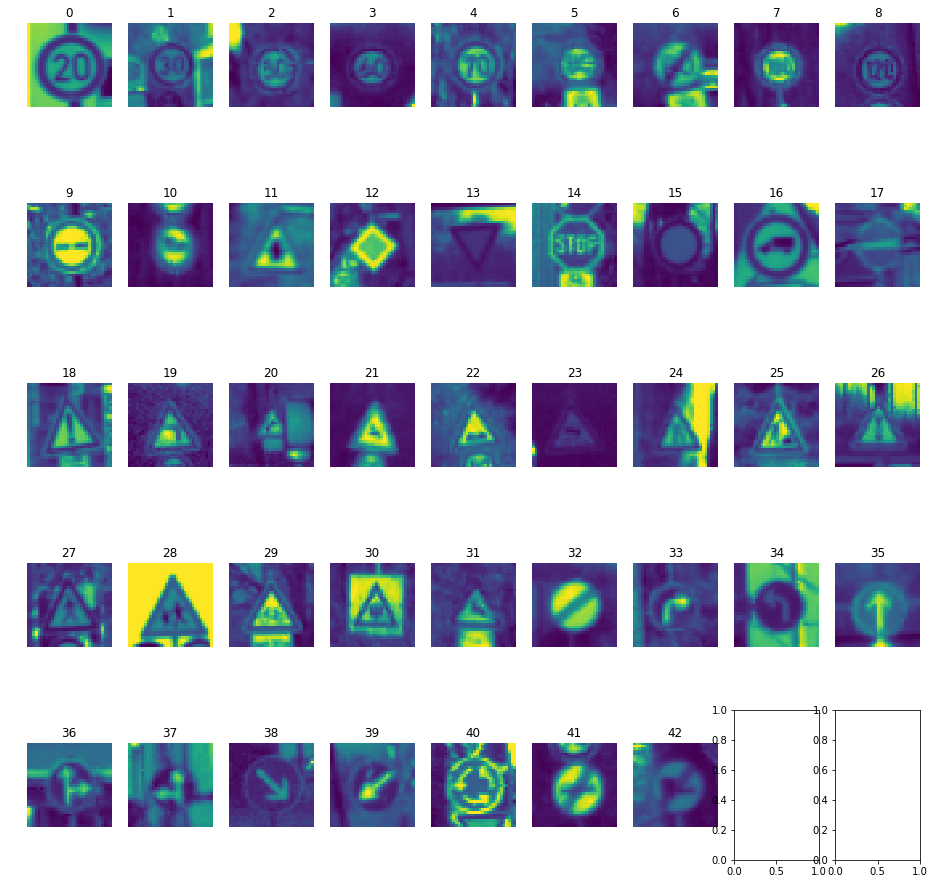

In [8]:
fig, axeslist = plt.subplots(ncols=len(train_unique) // 5 + 1, nrows=5, figsize=(16, 16))
for idx in range(len(train_unique)):
    first_occurrence_index = np.flatnonzero(train['labels'] == train_unique[idx])[0]

    image = train['features'][first_occurrence_index]
    image = rgb2gray(image)
    image = image.squeeze()
    axeslist.ravel()[idx].imshow(image)
    axeslist.ravel()[idx].set_title(train_unique[idx])
    axeslist.ravel()[idx].set_axis_off()

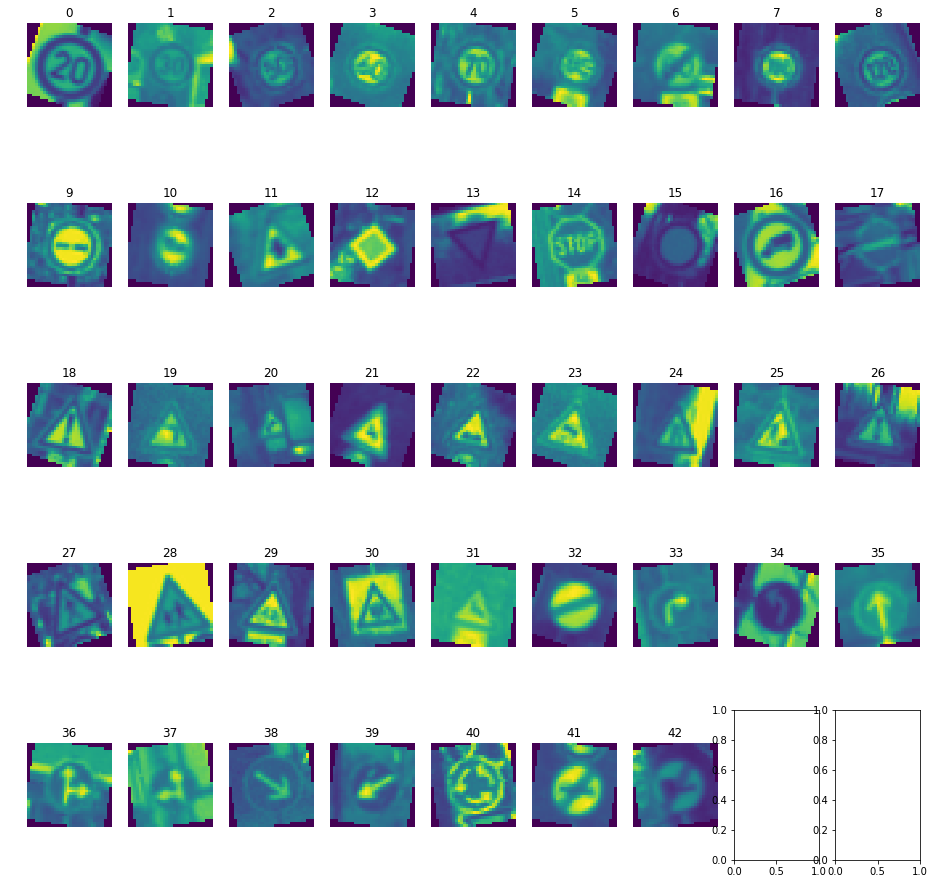

In [9]:
from scipy.ndimage.interpolation import rotate, shift

fig, axeslist = plt.subplots(ncols=len(train_unique) // 5 + 1, nrows=5, figsize=(16, 16))
for idx in range(len(train_unique)):
    first_occurrence_index = np.flatnonzero(train['labels'] == train_unique[idx])[0]

    image = train['features'][first_occurrence_index]
    image = rgb2gray(image)
    image = rotate(image, np.random.choice((-20., -10., 10., 20.)), reshape=False)
    image = image.squeeze()
    axeslist.ravel()[idx].imshow(image)
    axeslist.ravel()[idx].set_title(train_unique[idx])
    axeslist.ravel()[idx].set_axis_off()

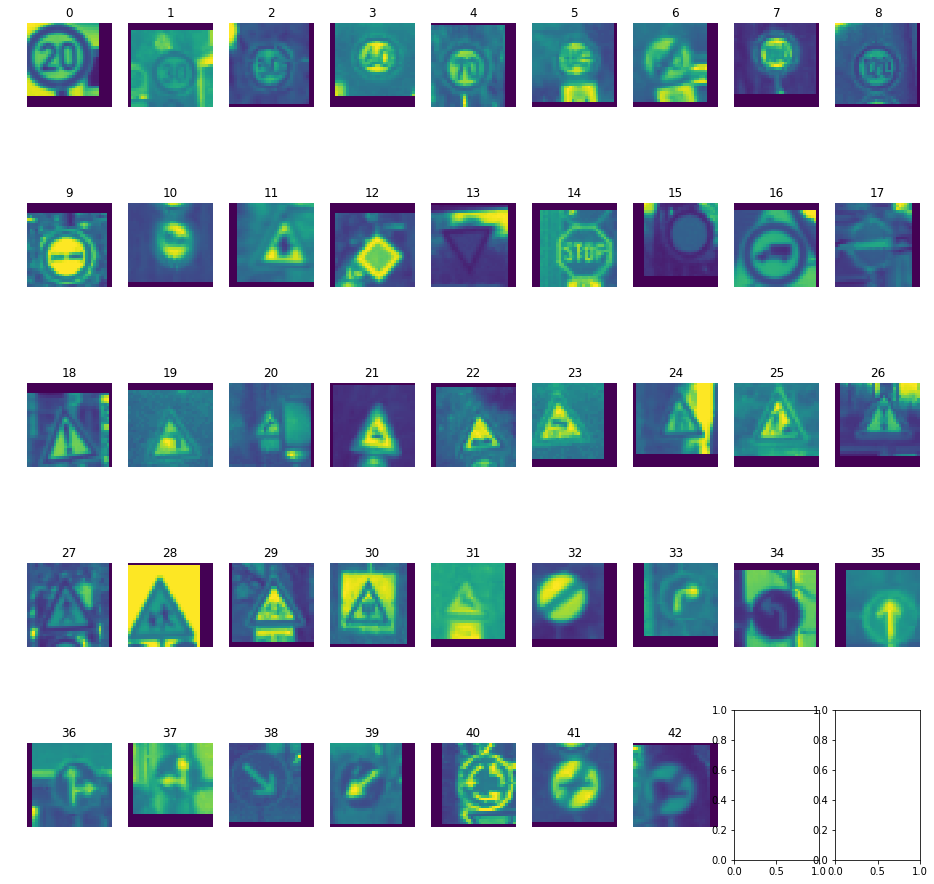

In [10]:
fig, axeslist = plt.subplots(ncols=len(train_unique) // 5 + 1, nrows=5, figsize=(16, 16))

for idx in range(len(train_unique)):
    first_occurrence_index = np.flatnonzero(train['labels'] == train_unique[idx])[0]

    image = train['features'][first_occurrence_index]
    image = rgb2gray(image)
    image = shift(image, (np.random.choice(np.arange(-5,5)), np.random.choice(np.arange(-5,5))))
    image = image.squeeze()
    axeslist.ravel()[idx].imshow(image)
    axeslist.ravel()[idx].set_title(train_unique[idx])
    axeslist.ravel()[idx].set_axis_off()

### Plot distribution of the classes of the signs for training, validation and test set

Signs code and their occurrences:  {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}


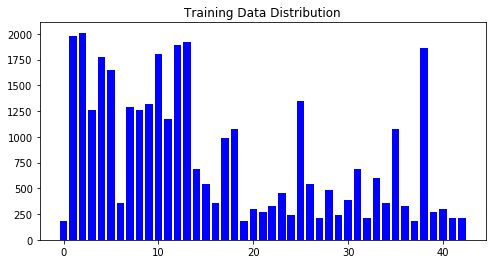

In [11]:
# frequency of the Signs occurred in training set
print("Signs code and their occurrences: ", train_unique_counts)
plt.figure(figsize=(8,4))
plt.title('Training Data Distribution')
plt.bar(list(train_unique_counts.keys()), train_unique_counts.values(), color='b')

plt.show()

In [12]:
valid_unique, valid_unique_counts = np.unique(valid['labels'], return_counts=True)
valid_unique_counts = dict(zip(valid_unique, valid_unique_counts))

Signs code and their occurrences:  {0: 30, 1: 240, 2: 240, 3: 150, 4: 210, 5: 210, 6: 60, 7: 150, 8: 150, 9: 150, 10: 210, 11: 150, 12: 210, 13: 240, 14: 90, 15: 90, 16: 60, 17: 120, 18: 120, 19: 30, 20: 60, 21: 60, 22: 60, 23: 60, 24: 30, 25: 150, 26: 60, 27: 30, 28: 60, 29: 30, 30: 60, 31: 90, 32: 30, 33: 90, 34: 60, 35: 120, 36: 60, 37: 30, 38: 210, 39: 30, 40: 60, 41: 30, 42: 30}


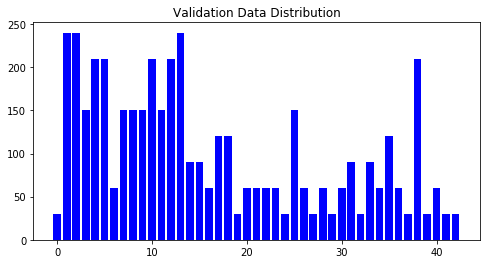

In [13]:
# frequency of the Signs occurred in validation set
print("Signs code and their occurrences: ", valid_unique_counts)
plt.figure(figsize=(8,4))
plt.title('Validation Data Distribution')
plt.bar(list(valid_unique_counts.keys()), valid_unique_counts.values(), color='b')

plt.show()

In [14]:
test_unique, test_unique_counts = np.unique(test['labels'], return_counts=True)
test_unique_counts = dict(zip(test_unique, test_unique_counts))

Signs code and their occurrences:  {0: 60, 1: 720, 2: 750, 3: 450, 4: 660, 5: 630, 6: 150, 7: 450, 8: 450, 9: 480, 10: 660, 11: 420, 12: 690, 13: 720, 14: 270, 15: 210, 16: 150, 17: 360, 18: 390, 19: 60, 20: 90, 21: 90, 22: 120, 23: 150, 24: 90, 25: 480, 26: 180, 27: 60, 28: 150, 29: 90, 30: 150, 31: 270, 32: 60, 33: 210, 34: 120, 35: 390, 36: 120, 37: 60, 38: 690, 39: 90, 40: 90, 41: 60, 42: 90}


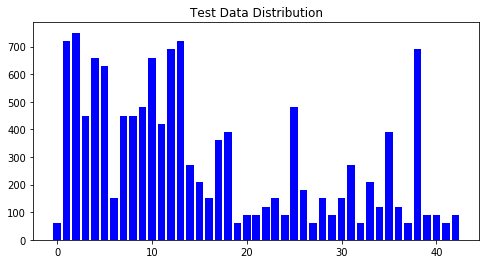

In [15]:
# frequency of the Signs occurred in validation set
print("Signs code and their occurrences: ", test_unique_counts)
plt.figure(figsize=(8,4))
plt.title('Test Data Distribution')
plt.bar(list(test_unique_counts.keys()), test_unique_counts.values(), color='b')

plt.show()

### What we can learn from the visualization

The distribution is unbalanced. Later you will see the classes that get low accuracy are those with fewer samples in the training set and validation set. But it's not the case for all such classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Gray scale the data, normalize the data and shuffle the data

In [21]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from numpy import newaxis

# transfer rgb images to gray scale images
X_train_gray, X_valid_gray, X_test_gray = rgb2gray(X_train)[..., newaxis], rgb2gray(X_valid)[..., newaxis], rgb2gray(X_test)[..., newaxis]

# set up global mean and global std to be applied to train, valid and test data
global_mean = X_train_gray.mean(axis=0)
global_std = X_train_gray.std(axis=0)

# normalize data
X_train_gray = (X_train_gray - global_mean) / global_std
X_valid_gray = (X_valid_gray - global_mean) / global_std
X_test_gray = (X_test_gray - global_mean) / global_std

#shuffle the data
X_train_gray, y_train = shuffle(X_train_gray, y_train)
print(X_train_gray[0].shape)
print(X_train_gray[0][0][0])



(32, 32, 1)
[-0.88657641]


### The following cells are about data augmentation. But it didn't work very well in my case. Also generating such data is time consuming. So I commented out the code used for generating randomly rotated and shifted data, kept the code used to load the augmented data so you can see what I did.

In [17]:
# signs_needed = {}
# for k in train_unique_counts:
#     signs_needed[k] = 6000 - train_unique_counts[k]
    
# print(sum(signs_needed.values()))

In [18]:
# X_train_gray_rotate = np.array([]).reshape(0, 32, 32, 1)
# y_train_gray_rotate = np.array([]).reshape(0,)
# X_train_gray_shift = np.array([]).reshape(0, 32, 32, 1)
# y_train_gray_shift = np.array([]).reshape(0,)

# for k in train_unique_counts:
#     num = signs_needed[k] // (2 * train_unique_counts[k])
#     if num < 1:
#         num = 1
#     for i in range(num):
#         index_k = np.where(y_train == k)

#         X_train_k = X_train_gray[index_k]
#         X_train_gray_rotate = np.append(X_train_gray_rotate, rotate(X_train_k, np.random.choice((-30., -20., -10., 10., 20., 30)), axes=(1, 2), reshape=False), axis=0)
#         X_train_gray_shift = np.append(X_train_gray_shift, shift(X_train_k, (0, np.random.choice(np.arange(-5,5)), np.random.choice(np.arange(-5,5)), 0)), axis=0)
        
#         y_train_gray_rotate = np.append(y_train_gray_rotate, np.full((len(X_train_k),), k), axis=0)
#         y_train_gray_shift = np.append(y_train_gray_shift, np.full((len(X_train_k),), k), axis=0)

# train_rotate = {}
# train_shift = {}

# train_rotate['features'] = X_train_gray_rotate
# train_rotate['labels'] = y_train_gray_rotate

# train_shift['features'] = X_train_gray_shift
# train_shift['labels'] = y_train_gray_shift
        
# fake_rotate = 'fake_rotate.p'
# fake_shift = 'fake_shift.p'

# with open(fake_rotate, "wb") as f:
#     pickle.dump(train_rotate, f)
# with open(fake_shift, "wb") as f:
#     pickle.dump(train_shift, f)

### Load pickled data

In [19]:
fake_rotate = 'fake_rotate.p'
fake_shift = 'fake_shift.p'

with open(fake_rotate, mode='rb') as f:
    train_rotate = pickle.load(f)
with open(fake_shift, mode='rb') as f:
    train_shift = pickle.load(f)

X_train_gray_rotate, y_train_gray_rotate = train_rotate['features'], train_rotate['labels']
X_train_gray_shift, y_train_gray_shift = train_shift['features'], train_shift['labels']

### concatenate rotated and shifted data to original gray scale data so you have a mixed set

In [20]:
print(X_train_gray_rotate.shape)
print(X_train_gray_shift.shape)

# X_train_gray_rotate, y_train_gray_rotate = shuffle(X_train_gray_rotate, y_train_gray_rotate)
# X_train_gray_shift, y_train_gray_shift = shuffle(X_train_gray_shift, y_train_gray_shift)

X_train_mixed = np.concatenate((X_train_gray, X_train_gray_rotate, X_train_gray_shift))
y_train_mixed = np.concatenate((y_train, y_train_gray_rotate, y_train_gray_shift))

X_train_mixed, y_train_mixed = shuffle(X_train_mixed, y_train_mixed)


(98726, 32, 32, 1)
(98726, 32, 32, 1)


### The size of the mixed data

In [21]:
print(len(X_train_mixed))
print(len(y_train_mixed))

232251
232251


### I generated more fake data for classes with fewer samples in training set so it's more balanced. This is the last cell for data augmentation

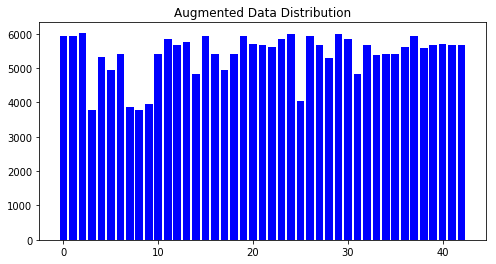

In [22]:
train_gray_unique, train_gray_unique_counts = np.unique(y_train_mixed, return_counts=True)
train_gray_unique_counts = dict(zip(train_gray_unique, train_gray_unique_counts))

plt.figure(figsize=(8,4))
plt.title('Augmented Data Distribution')
plt.bar(list(train_gray_unique_counts.keys()), train_gray_unique_counts.values(), color='b')

plt.show()

### You can execute the cell to see the gray scaled training set

(32, 32, 1)
5


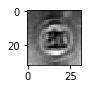

In [23]:
import random

index = random.randint(0, len(X_train_gray))
print(X_train_gray[index].shape)
image = X_train_gray[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

### Model Architecture

### Please ignore all comments in this cell. Some are code for more complicated model. Some are comments for that model. For this submission I used the vanilla LeNet-5 model. More detail in my write-up.

In [1]:
from tensorflow.contrib.layers import flatten

def LeNet(x, dropout_prob):
    mu = 0
    sigma = 0.1
    
    # Layer 1-a, output = 32 x 32 x 6, (H - K + 2 * P) / S + 1, so P = 1
    
    # First we need to pad to 34 x 34 x 3
    # Pad images with 0s
#     x = tf.pad(x, ((0,0),(1,1),(1,1),(0,0)), 'constant')
        
    conv1a_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1a_b = tf.Variable(tf.zeros(6))
    conv1a = tf.nn.conv2d(x, conv1a_W, strides=[1, 1, 1, 1], padding='VALID') + conv1a_b
    
    # Dropout layer
    conv1a_extract = tf.nn.dropout(conv1a, dropout_prob, noise_shape=[tf.shape(conv1a)[0], 1, 1, 6])
    
    # Activation
    conv1a = tf.nn.relu(conv1a_extract)
    
    # Layer 1-b, Input 32 x 32 x 6, Output 32x 32 x 6
    # if no padding, input 30 x 30 x 6, Output 28 x 28 x 6
    # Pad again
#     conv1a = tf.pad(conv1a, ((0,0),(1,1),(1,1),(0,0)), 'constant')
    
#     conv1b_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 6), mean=mu, stddev=sigma))
#     conv1b_b = tf.Variable(tf.zeros(6))
#     conv1b = tf.nn.conv2d(conv1a, conv1b_W, strides=[1, 1, 1, 1], padding="VALID") + conv1b_b
    
    # Dropout layer
#     conv1b = tf.nn.dropout(conv1b, dropout_prob, noise_shape=[tf.shape(conv1b)[0], 1, 1, 6])
    
    #Activation
#     conv1b = tf.nn.relu(conv1b)
    
    # Pooling 16 x 16 x 6
    # if no padding 14 x 14 x 6
    conv1 = tf.nn.max_pool(conv1a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2-a: Convolutional. Output = 16x16x16. (H - K + 2 * P) / S + 1, P = 1
    # if no padding, output = 12 x 12 x 16
    # Pad first
#     conv1 = tf.pad(conv1, ((0,0),(1,1),(1,1),(0,0)), 'constant')
    
    conv2a_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev=sigma))
    conv2a_b = tf.Variable(tf.zeros(16))
    conv2a = tf.nn.conv2d(conv1, conv2a_W, strides=[1,1,1,1], padding='VALID') + conv2a_b
    
    # Dropout layer
    conv2a_extract = tf.nn.dropout(conv2a, dropout_prob, noise_shape=[tf.shape(conv2a)[0], 1, 1, 16])
    
    # Activation.
    conv2a = tf.nn.relu(conv2a_extract)

    # Layer2-b: Convolutional: Output = 16 x 16 x 16
    # if no padding output =  10 x 10 x 16
#     conv2a = tf.pad(conv2a, ((0,0),(1,1),(1,1),(0,0)), 'constant')
    
#     conv2b_W = tf.Variable(tf.truncated_normal(shape=(3,3,16,16), mean = mu, stddev=sigma))
#     conv2b_b = tf.Variable(tf.zeros(16))
#     conv2b = tf.nn.conv2d(conv2a, conv2b_W, strides=[1,1,1,1], padding='VALID') + conv2b_b
    
    # Dropout layer
#     conv2b = tf.nn.dropout(conv2b, dropout_prob, noise_shape=[tf.shape(conv2b)[0], 1, 1, 16])
    
    # Activation
#     conv2b = tf.nn.relu(conv2b)
    
    #  Pooling. Input = 16x16x16. Output = 8x8x16.
    # if no padding input = 10 x 10 x 16. Output = 5 x 5 x 16
    conv2 = tf.nn.max_pool(conv2a, ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # TODO: Flatten. Input = 8x8x16. Output = 1024.
    # if no padding, input = 5 x 5 x 16. Output = 400
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 1024. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120),mean = mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Dropout layer
    fc1 = tf.nn.dropout(fc1, dropout_prob)
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 300. Output = 200.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Dropout layer
    fc2 = tf.nn.dropout(fc2, dropout_prob)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 200. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, conv1a_extract, conv2a_extract

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [2]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
dropout_prob = tf.placeholder(tf.float32, [])
one_hot_y = tf.one_hot(y, 43)

### Some code are commented out. That is for learning rate decay. I commented it out because in practise I didn't find it helpful.

In [3]:
# global_step = tf.Variable(0)
start_rate = 0.001
# rate = tf.train.exponential_decay(start_rate, global_step, 8000, 0.8, staircase=True)

logits, conv1_layer, conv2_layer = LeNet(x, dropout_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = start_rate)
training_operation = optimizer.minimize(loss_operation)

In [4]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, dropout_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy / num_examples

In [28]:
training_loss_history = []
validation_loss_history = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: 0.65})
            
        validation_loss, validation_accuracy = evaluate(X_valid_gray, y_valid)
        validation_loss_history.append(validation_loss)
        training_loss, training_accuracy = evaluate(X_train_gray, y_train)
        training_loss_history.append(training_loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.578

Training Accuracy = 0.622

EPOCH 2 ...
Validation Accuracy = 0.761

Training Accuracy = 0.796

EPOCH 3 ...
Validation Accuracy = 0.844

Training Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.864

Training Accuracy = 0.913

EPOCH 5 ...
Validation Accuracy = 0.874

Training Accuracy = 0.916

EPOCH 6 ...
Validation Accuracy = 0.887

Training Accuracy = 0.931

EPOCH 7 ...
Validation Accuracy = 0.893

Training Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.907

Training Accuracy = 0.949

EPOCH 9 ...
Validation Accuracy = 0.920

Training Accuracy = 0.954

EPOCH 10 ...
Validation Accuracy = 0.923

Training Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.923

Training Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.930

Training Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.926

Training Accuracy = 0.967

EPOCH 14 ...
Validation Accuracy = 0.933

Training Accuracy = 0.971

EPOCH 15 ...
Validation Accura

### This is the Loss change during the training for training and validation set.

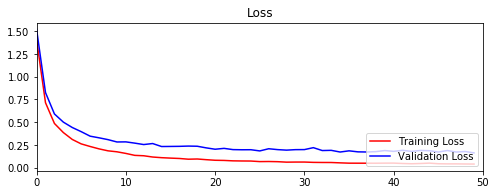

In [29]:
plt.figure(figsize=(8,6))
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(training_loss_history, 'r', label='Training Loss')
loss_plot.plot(validation_loss_history, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=4)

### Loss and accuracy on test set.

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_loss, test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Loss = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss = 0.301
Test Accuracy = 0.934


### Individual classes that have relatively higher loss and their accuaracy on validation set. You can see that classes with lower accuracy do have fewer samples in the training set.

In [31]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    for label in range(43):
        index_valid = np.where(y_valid == label)
        
        X_valid_label = X_valid_gray[index_valid]
        y_valid_label = y_valid[index_valid]
        
        valid_loss, valid_acc = evaluate(X_valid_label, y_valid_label)
        
        if valid_loss > 0.3:
            print("Valid Loss for {:} = {:.3f}".format(label, valid_loss))
            print("Valid Accuracy for {:} = {:.3f}".format(label, valid_acc))
            print()

Valid Loss for 0 = 0.304
Valid Accuracy for 0 = 0.933

Valid Loss for 5 = 0.388
Valid Accuracy for 5 = 0.924

Valid Loss for 20 = 1.374
Valid Accuracy for 20 = 0.683

Valid Loss for 21 = 0.904
Valid Accuracy for 21 = 0.717

Valid Loss for 23 = 0.300
Valid Accuracy for 23 = 0.950

Valid Loss for 24 = 1.406
Valid Accuracy for 24 = 0.533

Valid Loss for 25 = 0.439
Valid Accuracy for 25 = 0.893

Valid Loss for 27 = 1.638
Valid Accuracy for 27 = 0.500

Valid Loss for 29 = 0.312
Valid Accuracy for 29 = 0.867

Valid Loss for 40 = 1.005
Valid Accuracy for 40 = 0.433

Valid Loss for 41 = 0.303
Valid Accuracy for 41 = 0.900



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Resize the new images

Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)
Image size = (32, 32)


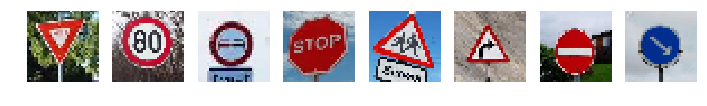

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image

new_imgs = []
for img in range(2, 10):
    img_file = "new-sign" + str(img) + ".jpg"
    img = Image.open(img_file)
    img = img.resize((32, 32))
    new_imgs.append(img)
    
fig, axeslist = plt.subplots(ncols=8, nrows=1, figsize=(12, 12))
for idx in range(len(new_imgs)):
    print("Image size = {:}".format(new_imgs[idx].size))
    axeslist.ravel()[idx].imshow(new_imgs[idx])
    axeslist.ravel()[idx].set_axis_off()
    new_imgs[idx] = np.asarray(new_imgs[idx])

### Sanity check the images dimension is right.

In [13]:
new_imgs = np.array(new_imgs)
print(new_imgs.shape)

(8, 32, 32, 3)


### Transfer the rgb images to gray scale

(8, 32, 32, 1)


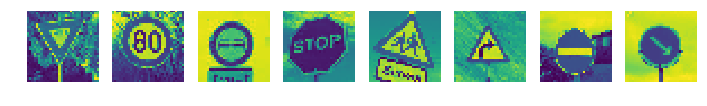

In [19]:
from numpy import newaxis

new_labels = np.array([13, 5, 9, 14, 28, 20, 17, 38])

new_imgs_gray = rgb2gray(new_imgs)[..., newaxis]
print(new_imgs_gray.shape)
fig, axeslist = plt.subplots(ncols=8, nrows=1, figsize=(12, 12))
for idx in range(len(new_imgs_gray)):
    axeslist.ravel()[idx].imshow(new_imgs_gray[idx].squeeze())
    axeslist.ravel()[idx].set_axis_off()
    new_imgs[idx] = np.asarray(new_imgs[idx])

### Normalize the data

In [22]:
new_imgs_gray = (new_imgs_gray - global_mean) / global_std

### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
predict_operation = tf.argmax(logits, 1)
softmax_operation = tf.nn.softmax(logits)

def predict(X_data, y_data):
    num_examples = len(X_data)
    
    sess = tf.get_default_session()
    predicted_labels = np.array([])
    softmax = np.array([]).reshape(0, 43)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        labels_batch, softmax_batch = sess.run([predict_operation, softmax_operation], feed_dict={x: batch_x, y: batch_y, dropout_prob: 1.0})
        predicted_labels = np.concatenate((predicted_labels, labels_batch))
        softmax = np.concatenate((softmax, softmax_batch), axis=0)
    return predicted_labels, softmax

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predicted_labels, softmax = predict(new_imgs_gray, new_labels)
    
    print(len(softmax))
    
    print("Predicted Labels = {:}".format(predicted_labels))
    print("True Labels = {:}".format(new_labels))

8
Predicted Labels = [ 25.   4.   9.  34.  40.  20.  17.  38.]
True Labels = [13  5  9 14 28 20 17 38]


### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    new_loss, new_acc = evaluate(new_imgs_gray, new_labels)
    
    print("Loss on new images = {:.3f}".format(new_loss))
    print("Accuracy on new images = {:.3f}".format(new_acc))

Loss on new images = 4.373
Accuracy on new images = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top_5 = sess.run(tf.nn.top_k(tf.constant(softmax), k=5))
    print("Top Five Softmax Probabilities for Each Images Are as Follows")
    print()
    print(top_5)

Top Five Softmax Probabilities for Each Images Are as Follows

TopKV2(values=array([[  9.99992609e-01,   6.77911157e-06,   2.68952647e-07,
          2.03811851e-07,   1.47947162e-07],
       [  3.83598298e-01,   3.19045931e-01,   2.77475893e-01,
          5.64590935e-03,   3.48903984e-03],
       [  7.15417564e-01,   1.44793749e-01,   6.84053749e-02,
          6.82359338e-02,   1.19378814e-03],
       [  8.87052894e-01,   6.52011409e-02,   3.00617088e-02,
          6.93132356e-03,   2.73060356e-03],
       [  5.80511570e-01,   2.09396780e-01,   7.84782916e-02,
          7.73040950e-02,   3.86660993e-02],
       [  7.92235434e-01,   2.07172737e-01,   4.39814175e-04,
          6.08382761e-05,   4.00854078e-05],
       [  9.99809325e-01,   1.63183780e-04,   2.57636402e-05,
          6.01185832e-07,   3.36503177e-07],
       [  9.99985099e-01,   1.43537081e-05,   5.11332530e-07,
          3.05862606e-08,   1.10810747e-08]]), indices=array([[25, 13, 21, 29, 38],
       [ 4,  2,  1,  5, 33],

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [44]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = rgb2gray(image_input)[..., newaxis]
    image_input = (image_input - global_mean) / global_std
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, dropout_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### I think the 1st layer maps respond to edges in the image

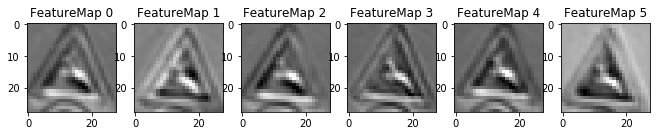

In [47]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    outputFeatureMap(X_train[800:801], conv1_layer)

### The 2nd layer maps respond to different positions of the image

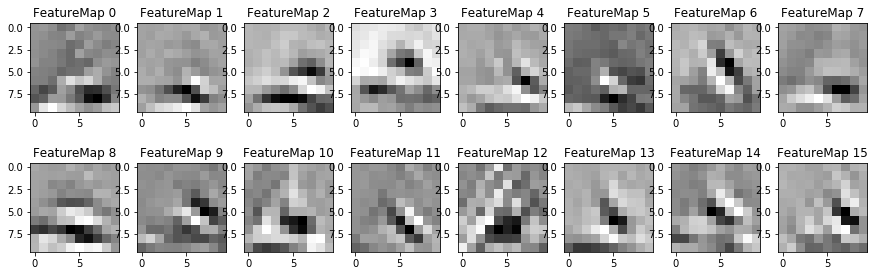

In [48]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    outputFeatureMap(X_train[800:801], conv2_layer)